# Microsofts's New Movie Studio

## Overview
### Problem 
- Okay, so Microsoft sees other big companies making cool video content and wants to join in. They're starting their own movie studio, but they're clueless about making movies. That's where I come in. I have to find out which types of films are doing well at the box office and translate that into actionable insights for the head of Microsoft's studio. This will help them decide what kind of films to create.
### Data Understanding 
- The data I have available to me come from a variety of movie databases.
- The data represents various movie attributes. Key among them being revenue generated, popularity and ratings which will serve as our success metrics in this analysis.
#### Questions to consider
- Does expensive mean successfull?
- Is studio important to success?
- Are some genres more successful than others?

In [96]:
# import relevant modules
import pandas as pd
import numpy as np
from scipy import stats
from decimal import Decimal

# visulization modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

### Data Preparation
- Get a better representation of user rating
- Fixing genre column in title.basics.csv
- Fix budget & revenue columns in tn.movie_budgets.csv

#### Getting a better representaion of user rating
- I doesn't seem fair to compare films with an avergae rating of 4 with only 100 voters to that with 4 and 10,000 voters.
- I will be using a method inspired by Bayesian probablity to  give a better representation of the rating.
- More information on how this works can be found  [here](https://stackoverflow.com/a/50476254)

In [2]:
# load the data
ratings_df = pd.read_csv('data/title.ratings.csv')

In [5]:
# Define the parameter R as the median of the averagerating column
R = np.median(ratings_df['averagerating'])

# Calculate the z-score for the 95% confidence level
z = stats.norm.ppf(0.975)

# Calculate W as z^2/4
W = z**2/4

# Calculate the Bayesian rating using the formula
ratings_df["bayesian_rating"] = (W * R + ratings_df["averagerating"] * ratings_df["numvotes"]) / (W + ratings_df["numvotes"])

# preview first 5 rows of the dataframe
ratings_df.head()


,tconst,averagerating,numvotes,bayesian_rating
0,tt10356526,8.3,31,8.245912
1,tt10384606,8.9,559,8.895884
2,tt1042974,6.4,20,6.404582
3,tt1043726,4.2,50352,4.200044
4,tt1060240,6.5,21,6.500000


#### Fixing genre column
- convert items in genre column to a list

In [8]:
# load the dat
basics_df = pd.read_csv('data/title.basics.csv')

In [10]:
txt = 'Hello'
[txt]

['Hello']

In [16]:
def text_to_list(text):
    # what to do if text is empty or not a string type
    if text == '' or type(text) != str:
        return np.nan
    # check if text has a comma
    elif ',' in text:
        return text.split(',')
    # what to do is text has no comma
    else:
        return [text]

In [17]:
# apply text_to_list to genres column
basics_df.loc[:, 'genres'] = basics_df['genres'].apply(text_to_list)

In [18]:
# previe results
basics_df['genres']

0           [Action, Crime, Drama]
1               [Biography, Drama]
2                          [Drama]
3                  [Comedy, Drama]
4         [Comedy, Drama, Fantasy]
                    ...           
146139                     [Drama]
146140               [Documentary]
146141                    [Comedy]
146142                         NaN
146143               [Documentary]
Name: genres, Length: 146144, dtype: object

#### Fixing budget and revenue

In [32]:
# function to change currency to numeric data type
def dollar_to_numeric(dollar):
    # check if the value is NaN
    if pd.isna(dollar):
        # return NaN as it is
        return dollar
    # otherwise, strip the dollar sign and replace commas with empty strings
    dollar = dollar.strip('$').replace(',', '')
    # convert the string to a Decimal object
    numeric = Decimal(dollar)
    # return the numeric value
    return float(numeric)

In [44]:
# read csv file
budgets_df = pd.read_csv('data/tn.movie_budgets.csv')

# apply function to production_budget column
budgets_df.loc[:, 'production_budget'] = budgets_df['production_budget'].apply(dollar_to_numeric)

# apply function to domestic_gross column
budgets_df.loc[:, 'domestic_gross'] = budgets_df['domestic_gross'].apply(dollar_to_numeric)

# apply function to worldwide_gross column
budgets_df.loc[:, 'worldwide_gross'] = budgets_df['worldwide_gross'].apply(dollar_to_numeric)

# preview first 5 rows
budgets_df.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2776345279.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1045663875.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,149762350.0
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1403013963.0
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1316721747.0


In [45]:
# change dtype of production_budget, domestic_gross and worldwide_gross to numeric
budgets_df['production_budget'] = pd.to_numeric(budgets_df['production_budget'], errors='coerce')
budgets_df['domestic_gross'] = pd.to_numeric(budgets_df['domestic_gross'], errors='coerce')
budgets_df['worldwide_gross'] = pd.to_numeric(budgets_df['worldwide_gross'], errors='coerce')

### Data Analysis

#### Does Expensive mean successfull?
##### Questions to answer?
- Do more expensive films get better ratings?
- Do more expensive films make more profit?
##### Conclusions?
- Budget and rating have a low positive linear relationship. Therfore it seems that more expensive films don't always result in a good reception by the audience. It should be noted that majority of the highest rated films have a high budget. So maybe if you aren't so sure about how your film will be recieved making more expensive won't increase you chances of a positive reception.
- Budget and profit have moderate positive linear relationship. It seems that more expesive films make more profit but doesn't mean that expensive films are more profitable. This could mean that spending more on the cast or visual effects leads to more profit but at the moment with the data with have we cannot claim that to be 100% true.

##### Budget vs. Rating

In [46]:
# create mapper to rename columns
new_names = {'movie': 'title',
             'worldwide_gross': 'revenue',
             'production_budget': 'budget'}

# rename columns
budgets_df.rename(columns=new_names, inplace=True)

In [47]:
# read csv file for movie title
title_df = pd.read_csv('data/title.basics.csv', usecols=['tconst', 'primary_title'])

# crate mapper to rename column
new_name = {'primary_title': 'title'}

# rename column
title_df.rename(columns=new_name, inplace=True)

In [48]:
# inner join ratings_df with title_df on tconst column
ratings_with_title = ratings_df.merge(right=title_df, on='tconst', how='inner')

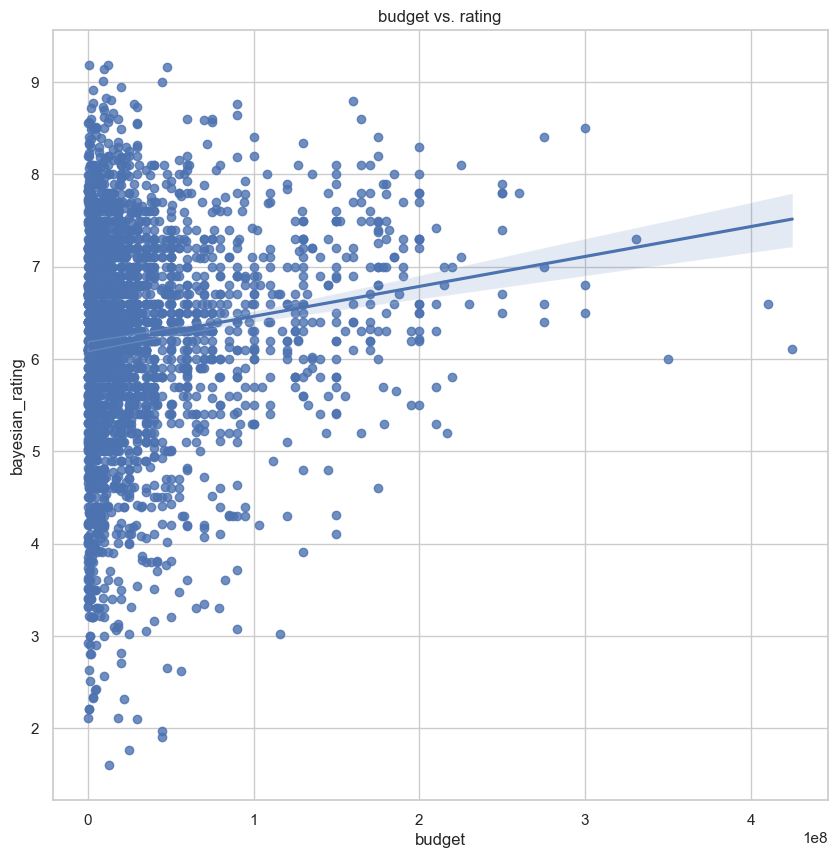

In [97]:
# create matplotlib figure and ax
fig, ax = plt.subplots(figsize=(10, 10))

# specify axis
x_axis = 'budget'
y_axis = 'bayesian_rating'

# plot an sns regplot
plot = sns.regplot(x=x_axis, y=y_axis, data=ratings_with_title.merge(right=budgets_df, on='title', how='inner'), ax=ax)

# set title
ax.set_title('budget vs. rating')

# show the plot
plt.show()

In [54]:
_ = ratings_with_title.merge(right=budgets_df, on='title', how='inner')
# Calculate correlation coefficient between bayesian_rating and budget
correlation = round(stats.pearsonr(_['bayesian_rating'], _['budget'])[0], 2)
print(correlation)

0.13


##### Budget vs. Profit

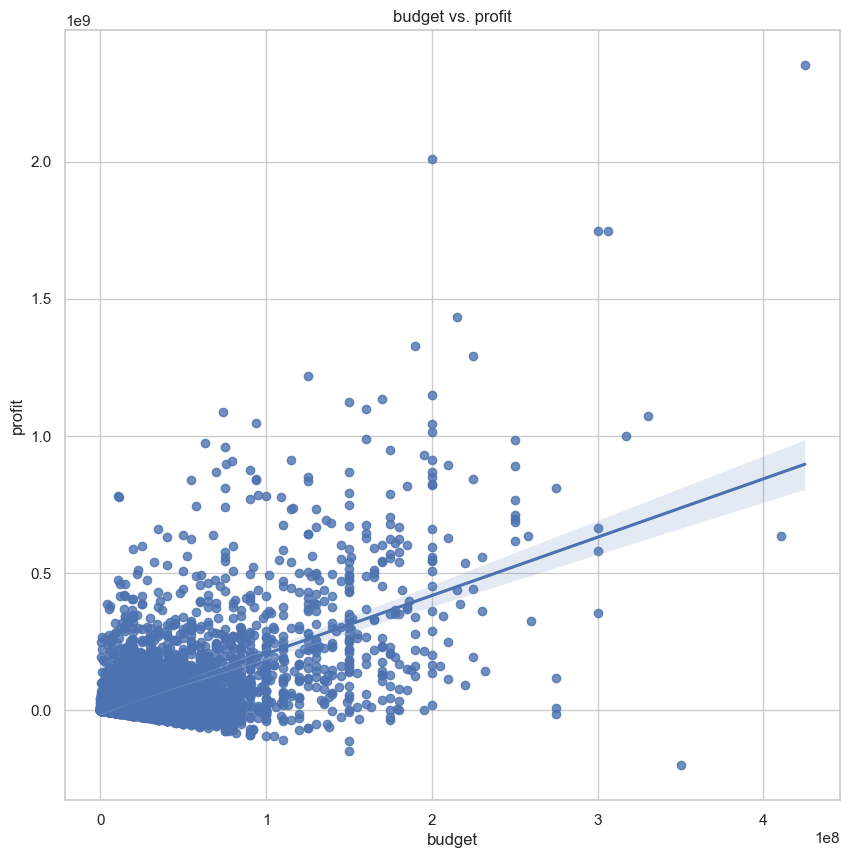

In [98]:
# create matplotlib figure and ax
fig, ax = plt.subplots(figsize=(10, 10))

# specify axis
x_axis = budgets_df['budget']
y_axis = budgets_df['revenue'] - budgets_df['budget']

# plot an sns regplot
plot = sns.regplot(x=x_axis, y=y_axis, ax=ax)

# set title
ax.set_title('budget vs. profit')

# set y-axis
ax.set_ylabel('profit')

# show the plot
plt.show()

In [68]:
# Calculate correlation coefficient between bayesian_rating and budget
correlation = round(stats.pearsonr(y_axis, x_axis)[0], 2)
print(correlation)

0.61


#### Are some genres more successful than others
##### Conclusion: Yes, some genres are more successful than others
- Yes the genres with the most investment are more profitable. The top 5 most expensive genres are also the top 5 most profitable genres.
- The genres with the least investment are also the least profitable. The least expensive genres are also the least profitable genres.
- A reason for this might be because of the wide appeal of these genres, esspecially animation and adventure.
- The type of genre doesn't really seem to influence the rating of the film as most of them as clustered around 6 - 7


##### Genre vs. Revenue

In [86]:
# mapper for new column name
new_name = {'primary_title': 'title'}

# rename column 
basics_df.rename(columns=new_name, inplace=True)

In [90]:
# specify columns to use
usecols = ['genres', 'budget', 'revenue']

# inner merge budgets_df with basics_df on title column
genres_and_budget = basics_df.merge(right=budgets_df, on='title', how='inner')[usecols]

In [92]:
# drop rows where the genres column is NaN
genres_and_budget.dropna(subset=['genres'], axis=0, inplace=True)

In [114]:
# Create a list to store expnaded rows
expanded_rows = []

# Expand basics_df by creating new rows for each genre
for _, row in genres_and_budget.iterrows():
    genres = row['genres']
    revenue = row['revenue']
    budget = row['budget']
    for genre in genres:
        expanded_rows.append({'genre': genre.strip(), 'revenue': revenue, 'budget': budget})

# Create a new DataFrame from the list of expanded rows
expanded_df = pd.DataFrame(expanded_rows)

# Group  by genre and calculate the mean 
genre_revenue = expanded_df.groupby('genre').mean()

# reset index
genre_revenue = genre_revenue.reset_index()

In [115]:
genre_revenue.columns

Index(['genre', 'revenue', 'budget'], dtype='object')

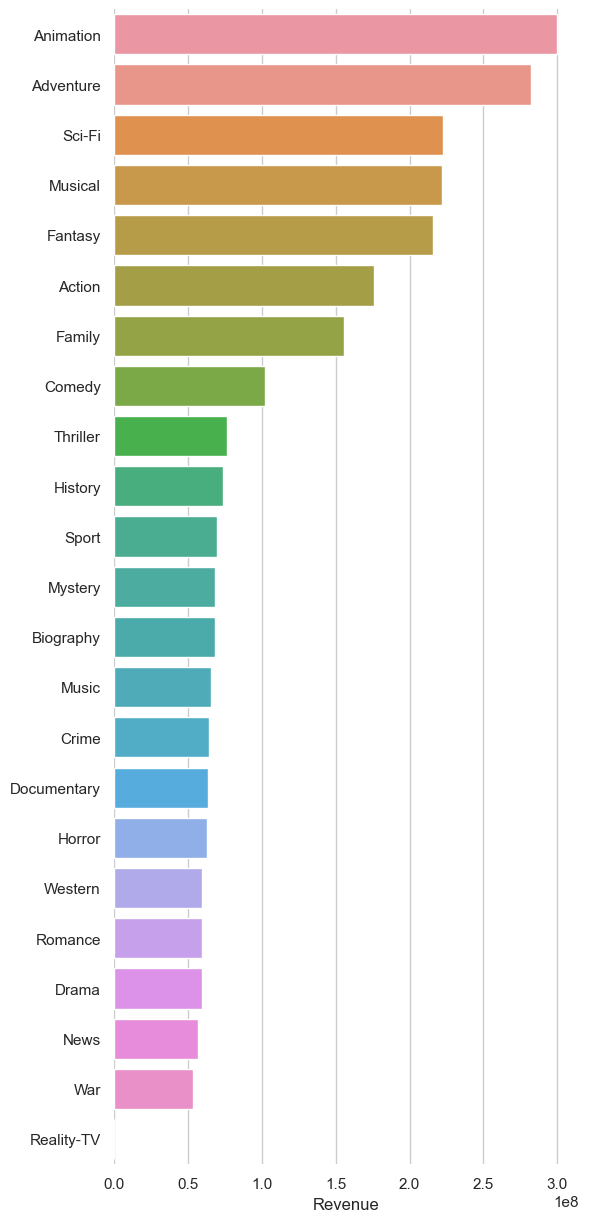

In [119]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the revenue by genre
sns.barplot(x='revenue', y='genre', data=genre_revenue.sort_values(by=['revenue'], ascending=False), ax=ax)

# Add informative axis label
ax.set(ylabel='', xlabel='Revenue')
sns.despine(left=True, bottom=True)

##### Genre vs. Budget

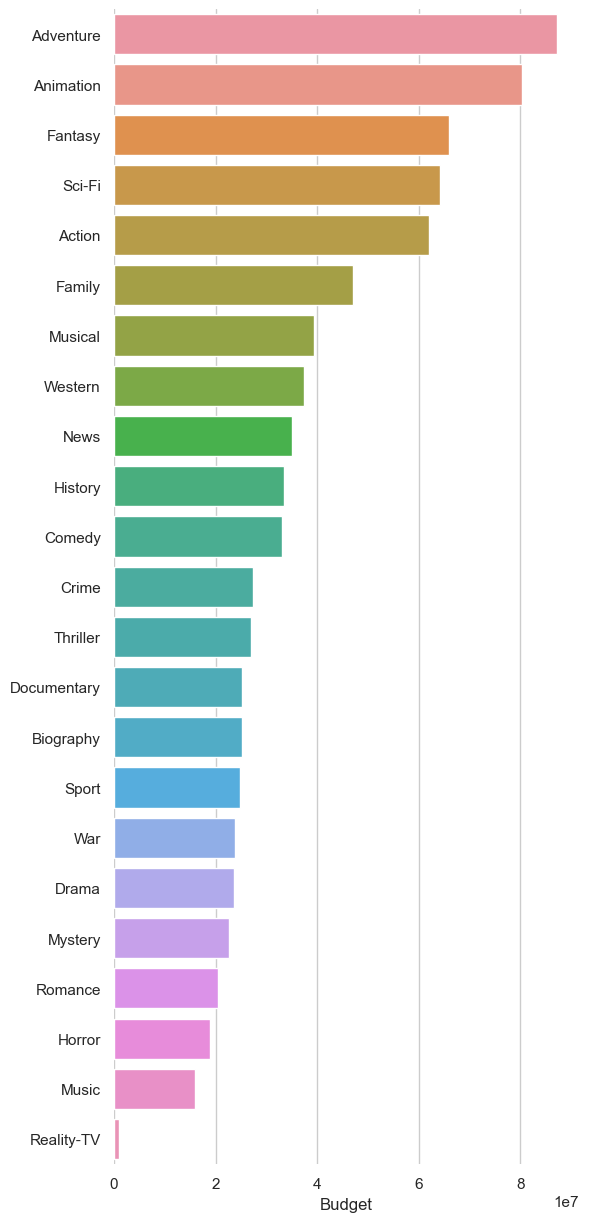

In [123]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the revenue by genre
sns.barplot(x='budget', y='genre', data=genre_revenue.sort_values(by=['budget'], ascending=False), ax=ax)

# Add informative axis label
ax.set(ylabel='', xlabel='Budget')
sns.despine(left=True, bottom=True)

##### Genre vs. Profit

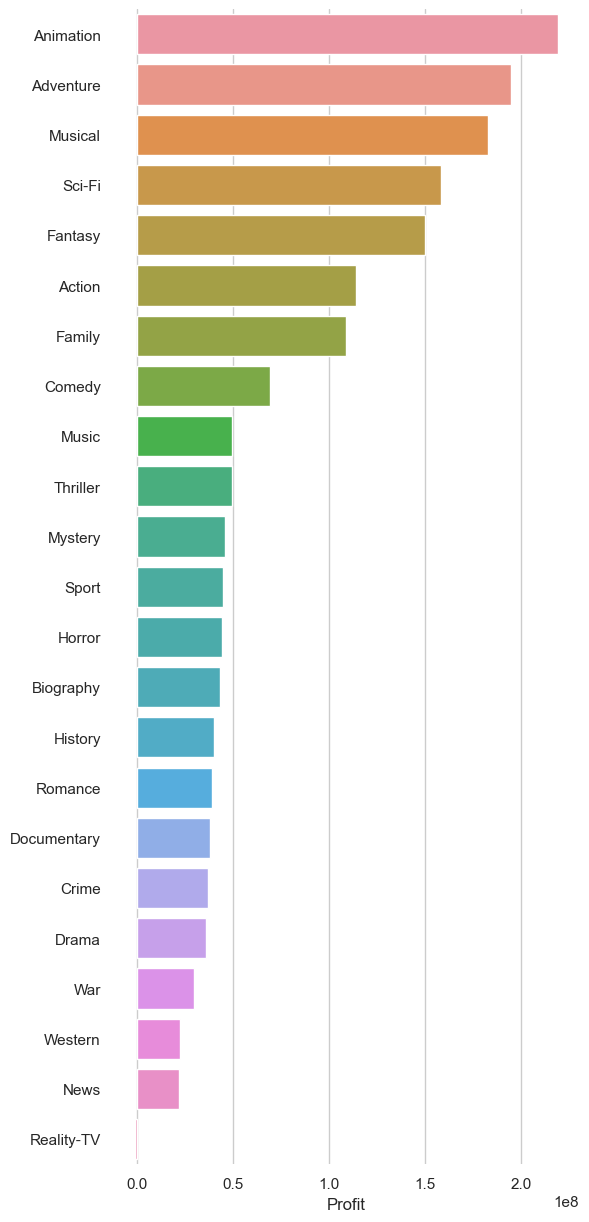

In [122]:
genre_revenue['profit'] = genre_revenue['revenue'] - genre_revenue['budget']

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the profit by genre
sns.barplot(x='profit', y='genre', data=genre_revenue.sort_values(by=['profit'], ascending=False), ax=ax)

# Add informative axis label
ax.set(ylabel='', xlabel='Profit')
sns.despine(left=True, bottom=True)

##### Genres vs. Popularity

In [128]:
# specify columns to use
usecols = ['genres', 'bayesian_rating']

# merge basics_df and ratings_df on the tconst column using an inner join
# and save the result to basics_ratings_df
basics_ratings_df = basics_df.merge(ratings_df, on='tconst', how='inner')[usecols]

# drop rows where the genres column is NaN
basics_ratings_df.dropna(subset=['genres'], axis=0, inplace=True)

In [129]:
# Create a list to store expnaded rows
expanded_rows = []

# Expand basics_ratings_df by creating new rows for each genre
for _, row in basics_ratings_df.iterrows():
    genres = row['genres']
    rating = row['bayesian_rating']
    for genre in genres:
        expanded_rows.append({'genre': genre.strip(), 'rating': rating})

# Create a new DataFrame from the list of expanded rows
expanded_df = pd.DataFrame(expanded_rows)

# Group  by genre and calculate the mean 
genre_rating = expanded_df.groupby('genre').mean()

# reset index
genre_rating = genre_rating.reset_index()

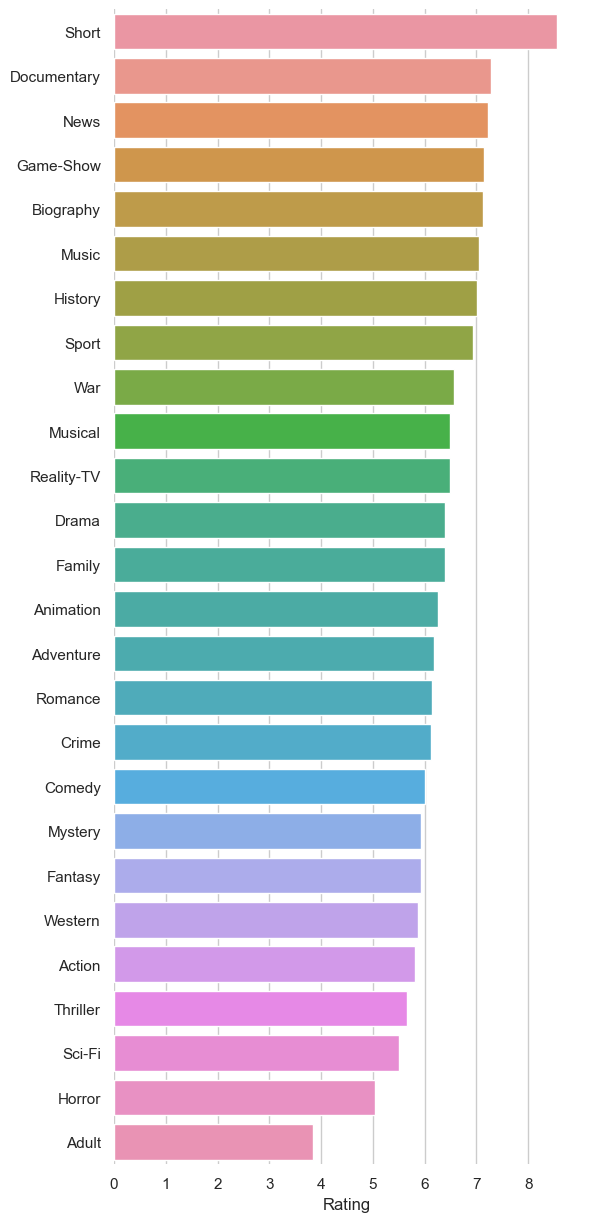

In [131]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the bayesian_rating by genre
sns.barplot(x='rating', y='genre', data=genre_rating.sort_values(by=['rating'], ascending=False), ax=ax)

# Add informative axis label
ax.set(ylabel='', xlabel='Rating')
sns.despine(left=True, bottom=True)